### IMPORT, FUNKTIONEN UND DATEN

In [1]:
from nltk.tokenize.punkt import PunktLanguageVars
from nltk.util import bigrams
from nltk.util import trigrams
import numpy
from collections import Counter
import os
import pandas as pd
import seaborn as sns

In [2]:
with open('Bakchen.txt', 'r', encoding='utf-8') as f:
    bakchen = f.read()

In [3]:
def compare_bigrams(target, comparison):
    p = PunktLanguageVars()
    target = target.replace(',', '').replace('.', '').replace(':', '').replace(';', '')
    target_bigrams = Counter(bigrams(p.word_tokenize(target)))
    comparison = comparison.replace(',', '').replace('.', '').replace(':', '').replace(';', '')
    comparison_bigrams = Counter(bigrams(p.word_tokenize(comparison)))
    overlap = target_bigrams & comparison_bigrams
    total_count = sum(overlap.values())
    relative_count = total_count/sum(comparison_bigrams.values())
    return overlap, total_count, relative_count
    

In [4]:
def compare_trigrams(target, comparison):
    p = PunktLanguageVars()
    target = target.replace(',', '').replace('.', '').replace(':', '').replace(';', '')
    target_trigrams = Counter(trigrams(p.word_tokenize(target)))
    comparison = comparison.replace(',', '').replace('.', '').replace(':', '').replace(';', '')
    comparison_trigrams = Counter(trigrams(p.word_tokenize(comparison)))
    overlap = target_trigrams & comparison_trigrams
    total_count = sum(overlap.values())
    relative_count = total_count/sum(comparison_trigrams.values())
    return overlap, total_count, relative_count

In [5]:
folder_path = "Text Files"

# Dictionary to store the file contents with filenames as keys
plato_works = {}

# Iterate through all the files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a .txt file
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        # Read the content of the file
        with open(file_path, "r", encoding="utf-8") as file:
            content = file.read()
        # Save the content in the dictionary using the filename without extension
        file_name_without_ext = os.path.splitext(filename)[0]
        plato_works[file_name_without_ext] = content.lower()


### BI_ UND TRIGRAMME OHNE LEMMATIZATION

In [6]:
bakchen_plato_bigram_overlap = [[name, compare_bigrams(bakchen, value)[0], compare_bigrams(bakchen, value)[1], compare_bigrams(bakchen, value)[2]] for name, value in plato_works.items()]
data_bi = pd.DataFrame(bakchen_plato_bigram_overlap)    
data_bi

,0,1,2,3
0,Alc.+1,"{('τήν', 'τε'): 1, ('καὶ', 'πᾶν'): 1, ('πᾶν', ...",255,0.024832
1,Alc.+2,"{('πᾶν', 'τὸ'): 1, ('μὲν', 'οὖν'): 7, ('τε', '...",126,0.030201
2,Apol.,"{('δεῖ', 'γὰρ'): 1, ('τῶν', 'ἐμῶν'): 2, ('μὲν'...",207,0.023953
3,Charm.,"{('πᾶν', 'τὸ'): 1, ('μὲν', 'οὖν'): 7, ('τε', '...",178,0.022323
4,Cleit.,"{('τε', 'καὶ'): 5, ('ὡς', 'οὐ'): 1, ('εἰ', 'δ᾽...",49,0.031736
5,Crat.,"{('τήν', 'τε'): 1, ('τὴν', 'ἁμαρτίαν'): 1, ('κ...",291,0.015978
6,Criti.,"{('τήν', 'τε'): 1, ('πᾶν', 'τὸ'): 1, ('μὲν', '...",137,0.027772
7,Crito,"{('τῶν', 'ἐμῶν'): 1, ('μὲν', 'οὖν'): 3, ('τε',...",125,0.030005
8,Epin.,"{('τήν', 'τε'): 1, ('μὲν', 'οὖν'): 7, ('τε', '...",183,0.029191
9,Epistels,"{('τήν', 'τε'): 1, ('καὶ', 'πᾶν'): 1, ('πᾶν', ...",316,0.018750


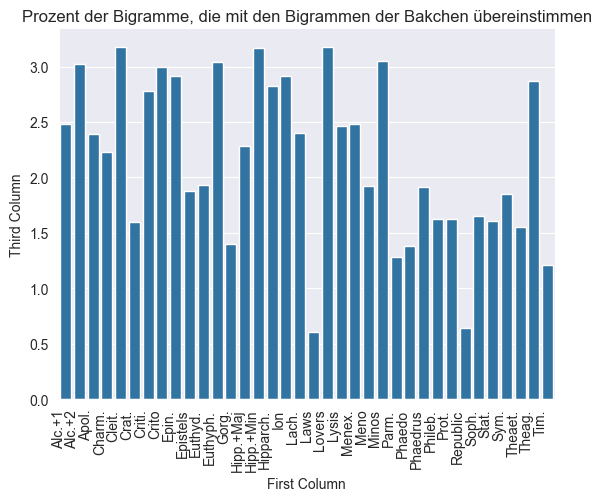

In [17]:
# Bar plot using Seaborn
plot = sns.barplot(x=data_bi.iloc[:, 0], y=data_bi.iloc[:, 3]*100)
plot.set_xticks(range(len(data_bi.iloc[:, 0]))) 
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha="right")

# Add labels and title
plot.set_xlabel("First Column")
plot.set_ylabel("Third Column")
plot.set_title("Prozent der Bigramme, die mit den Bigrammen der Bakchen übereinstimmen")

# Show the plot
sns.despine()

Aus den Bigrammen ohne Lemmatization lässt sich nicht wirklich etwas schließen. Das ist wenig überraschend, da Altgriechisch eine Sprache ist, die reich an Partikeln ist, man sollte also generell "viele" übereinstimmende Bigramme erwarten - solange man die Stopworte nicht herausfiltert. 

In [8]:
bakchen_plato_trigram_overlap = [[name, compare_trigrams(bakchen, value)[0], compare_trigrams(bakchen, value)[1], compare_trigrams(bakchen, value)[2]] for name, value in plato_works.items()]
data_tri = pd.DataFrame(bakchen_plato_trigram_overlap)    
data_tri

,0,1,2,3
0,Alc.+1,"{('καὶ', 'πᾶν', 'τὸ'): 1, ('οἱ', 'δ᾽', 'ἄλλοι'...",7,0.000682
1,Alc.+2,"{('τε', 'καὶ', 'τυραννίδα'): 1, ('ἐγὼ', 'μὲν',...",3,0.000719
2,Apol.,"{('οἱ', 'δ᾽', 'ἄλλοι'): 1, ('καὶ', 'γὰρ', 'ἐν'...",4,0.000463
3,Charm.,"{('οὐκ', 'ἔστιν', 'οὕτως'): 1, ('τό', 'γ᾽', 'ἐ...",2,0.000251
4,Cleit.,{},0,0.000000
5,Crat.,"{('κατ᾽', 'ἐμὲ', 'καὶ'): 1, ('μὲν', 'οὖν', 'κα...",8,0.000439
6,Criti.,"{('πρῶτον', 'μὲν', 'οὖν'): 1, ('τί', 'δ᾽', 'οὐ...",2,0.000406
7,Crito,"{('πρῶτον', 'μὲν', 'οὖν'): 1, ('πῶς', 'γὰρ', '...",3,0.000720
8,Epin.,"{('εἰ', 'δ᾽', 'ἔστιν'): 1}",1,0.000160
9,Epistels,"{('ἐγὼ', 'μὲν', 'οὖν'): 1, ('μὲν', 'οὖν', 'καὶ...",8,0.000475


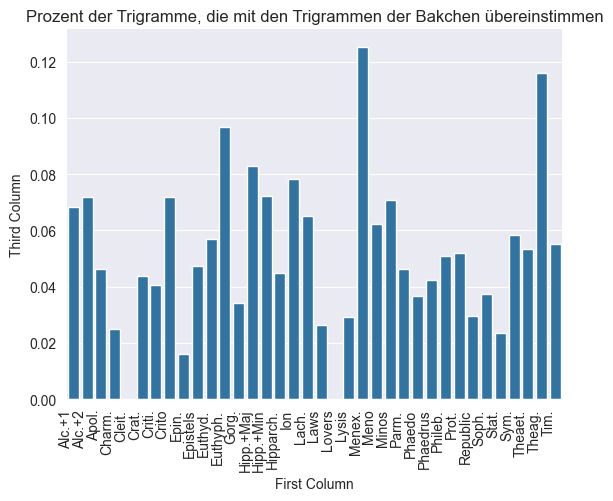

In [10]:
# Bar plot using Seaborn
plot = sns.barplot(x=data_bi.iloc[:, 0], y=data_tri.iloc[:, 3]*100)
plot.set_xticks(range(len(data_bi.iloc[:, 0]))) 
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha="right")

# Add labels and title
plot.set_xlabel("First Column")
plot.set_ylabel("Third Column")
plot.set_title("Prozent der Trigramme, die mit den Trigrammen der Bakchen übereinstimmen")

# Show the plot
sns.despine()

Aus den Trigrammen ohne Lemmatization lässt sich etwas mehr schließen. Aus dem relativen Verhältnis kann man auf eine mögliche Ähnlichkeit zwischen Bakchen und Menexenos, Theagenes und Euthyphro schließen. Aber man beachte, dass die Anzahl der übereinstimmenden Trigramme bei 6 respektive 4 liegt... schauen wir  mal auf das Ganze mit Lemmatization!

### BI- UND TRIGRAMME MIT LEMMATIZATION


Die Lemmatizierung musste ich in Python 3.9 machen, sie findet sich in "Lemmatize.py". Der Rest meines Codes läuft allerdings in Python 3.12, mach braucht also zwei verschiedene Environments, um das ganze Projekt rekreieren zu können... 

Laden wir also unsere lemmatized Texte

In [11]:
with open('Bakchen.with_lemma.txt', 'r', encoding='utf-8') as f:
    bakchen_lem = f.read()

In [12]:
folder_path = "Lemma Text Files"

# Dictionary to store the file contents with filenames as keys
plato_works_lem = {}

# Iterate through all the files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a .txt file
    if filename.endswith(".txt") and not filename.startswith('Bakchen'):
        file_path = os.path.join(folder_path, filename)
        # Read the content of the file
        with open(file_path, "r", encoding="utf-8") as file:
            content = file.read()
        # Save the content in the dictionary using the filename without extension
        file_name_without_ext = os.path.splitext(filename)[0]
        plato_works_lem[file_name_without_ext[:-11]] = content


In [13]:
bakchen_plato_bigram_lemma_overlap = [[name, compare_bigrams(bakchen_lem, value)[0], compare_bigrams(bakchen_lem, value)[1], compare_bigrams(bakchen_lem, value)[2]] for name, value in plato_works_lem.items()]
data_bi_lem = pd.DataFrame(bakchen_plato_bigram_lemma_overlap)    
data_bi_lem

,0,1,2,3
0,Alc.+1,"{('ἕλλην', 'βάρβαρος'): 1, ('τ᾽', 'ἔχω'): 1, (...",63,0.012111
1,Alc.+2,"{('ἕλλην', 'βάρβαρος'): 1, ('δεῖ', 'πόλις'): 1...",34,0.015302
2,Apol.,"{('γῆ', 'πᾶς'): 1, ('οἶδα', 'δέ'): 1, ('ἄνθρωπ...",56,0.012877
3,Charm.,"{('μήτηρ', 'τίκτω'): 1, ('οἶδα', 'δέ'): 1, ('ἐ...",44,0.011317
4,Cleit.,"{('δέ', 'ὄνομα'): 1, ('δέ', 'αὖ'): 1, ('λέγω',...",7,0.008816
5,Crat.,"{('ἕλλην', 'βάρβαρος'): 1, ('θεός', 'οἶδα'): 1...",82,0.008928
6,Criti.,"{('θεός', 'οἶδα'): 1, ('θεός', 'θεός'): 1, ('γ...",22,0.007917
7,Crito,"{('δέ', 'κακός'): 1, ('νόος', 'ἔχω'): 2, ('οἷο...",22,0.010843
8,Epin.,"{('ἕλλην', 'βάρβαρος'): 1, ('ἔχω', 'μορφή'): 1...",52,0.014748
9,Epistels,"{('ἕλλην', 'βάρβαρος'): 1, ('ἕλλην', 'πόλις'):...",86,0.009528


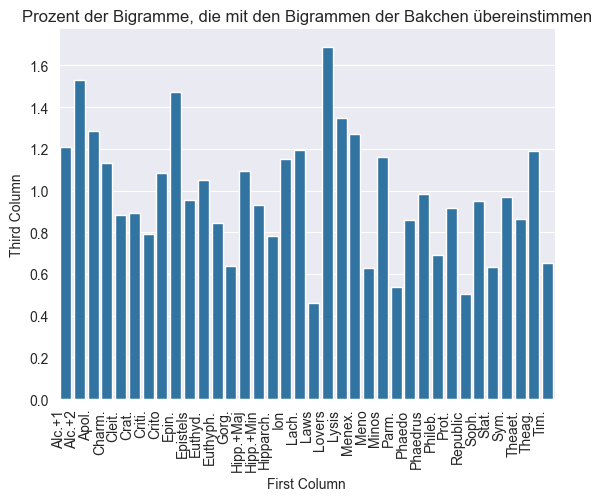

In [14]:
# Bar plot using Seaborn
plot = sns.barplot(x=data_bi_lem.iloc[:, 0], y=data_bi_lem.iloc[:, 3]*100)
plot.set_xticks(range(len(data_bi_lem.iloc[:, 0]))) 
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha="right")

# Add labels and title
plot.set_xlabel("First Column")
plot.set_ylabel("Third Column")
plot.set_title("Prozent der Bigramme, die mit den Bigrammen der Bakchen übereinstimmen")

# Show the plot
sns.despine()

In [15]:
bakchen_plato_trigram_lemma_overlap = [[name, compare_trigrams(bakchen_lem, value)[0], compare_trigrams(bakchen_lem, value)[1], compare_trigrams(bakchen_lem, value)[2]] for name, value in plato_works_lem.items()]
data_tri_lem = pd.DataFrame(bakchen_plato_trigram_lemma_overlap)    
data_tri_lem

,0,1,2,3
0,Alc.+1,"{('νύκτωρ', 'μεθ᾽', 'ἡμέρα'): 1, ('νῦν', 'δέ',...",2,0.000385
1,Alc.+2,{},0,0.000000
2,Apol.,{},0,0.000000
3,Charm.,{},0,0.000000
4,Cleit.,{},0,0.000000
5,Crat.,"{('οὐδέ', 'οἷος', 'τ᾽'): 1}",1,0.000109
6,Criti.,{},0,0.000000
7,Crito,{},0,0.000000
8,Epin.,{},0,0.000000
9,Epistels,{},0,0.000000


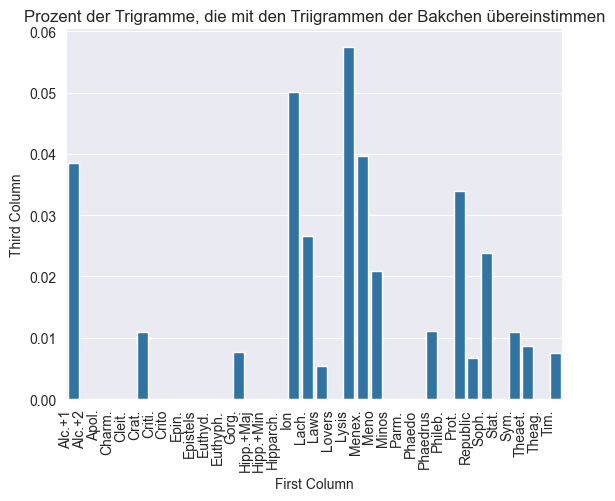

In [16]:
# Bar plot using Seaborn
plot = sns.barplot(x=data_tri_lem.iloc[:, 0], y=data_tri_lem.iloc[:, 3]*100)
plot.set_xticks(range(len(data_tri_lem.iloc[:, 0]))) 
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha="right")

# Add labels and title
plot.set_xlabel("First Column")
plot.set_ylabel("Third Column")
plot.set_title("Prozent der Trigramme, die mit den Triigrammen der Bakchen übereinstimmen")

# Show the plot
sns.despine()

Durch Lemmatization und Herausfiltern der Stopworte, hat sich die Anzahl an übereinstimmenden Bi- und Trigrammen massiv verringert. Bei genauerer Betrachtung der "unlemmatized" Bi- und Trigramme ist das wenig überraschend, da die meisten von ihnen aus Stopworten bestanden. Bei den Bigrammen liegen Lovers, der Alkibiades Minor und der Epinomis vorne. Die meisten Übereinstimmungen mit den Bakchen haben bei den lemmatized Trigrammen: Lysis, Ion und Menexenos. Man beachte, dass nur der Menexenos schon einmal oben genannt wurde, bei den unlemmatized Trigrammen.

### RESULTATE:

### Top unlemmatized Trigramme: Menexenos, Theagenes und Euthyphro
### Top lemmatized Bigramme: Lovers, Alkibiades Minor, Epinomis
### Top lemmatized Trigramme: Lysis, Ion, Menexenos 

### ÄHNLICHE SÄTZE

Bisher haben wir geschaut, welche Platonwerke (wenn man dies an relativer Bi- oder Trigrammzahl misst) den Bakchen am ähnlichsten sind. Nun wollen wir schauen, welches die Sätze sind, in denen Bigrammübereinstimmungen vorkommen (bei den lemmatized Texten).

In [130]:
#Unterteil griechischen Text in Sätze. Da Altgriechisch andere Satzzeichen verwendet habe ich meine eigene Funktion geschrieben.
def make_sentences(text):
    sentences = []
    sentence = ""
    tokens = text.split()
    for word in tokens:
        if word in [',', '\n', "'"]:
            continue
        elif word in [';', ':', '.']:
            if sentence:
                sentences.append(sentence[:-1])
                sentence = ""
        else:
            sentence += word+" "
    return sentences

In [131]:
bakchen_sentences = make_sentences(bakchen_lem)
plato_sentences = []
for work in plato_works_lem:
    sentences_lem = make_sentences(plato_works_lem[work])
    for line in sentences_lem:
        plato_sentences.append([line, work])
plato_sentences

[['παῖς Κλεινίας οἶμαι θαυμάζω πρῶτος ἐραστής γίγνομαι παύω μόνος ἀπαλλάττω δι᾽ ὄχλος ἐγένοντό διαλεγόμενοι τοσοῦτος ἔτος προσεῖπον',
  'Alc.+1'],
 ['αἴτιος γίγνομαι ἀνθρώπειος δαιμόνιον ἐναντίωμα δύναμις ὕστερος πεύω',
  'Alc.+1'],
 ['νῦν ἐπεί οὐκέτι ἐναντιόω προσελήλυθα', 'Alc.+1'],
 ['εὔελπις δέ λοιπός ἐναντιόομαι', 'Alc.+1'],
 ['σχεδόν κατανενόηκα χρόνος σκοπέω ἐραστής ἔχω', 'Alc.+1'],
 ['πολύς γίγνομαι μεγαλοφρόνων ὑπερβλέω φρόνημα πέφευγεν', 'Alc.+1'],
 ['λόγος ὑπερπεφρόνηκας ἐθέλω διέρχομαι', 'Alc.+1'],
 ['φημί ἄνθρωπος ἐνδεής', 'Alc.+1'],
 ['ὑπάρχω μέγας μηδείς δέω σῶμα ἀρξάμενα τελευτάω ψυχή', 'Alc.+1'],
 ['οἴει πρῶτος κάλλιστός μέγας — πᾶς δῆλος εἶδον ψεύδῃ — ἔπειτα νεανικωτάτου γένος σεαυτοῦ πόλις εἰμί μέγας ἑλληνίς ἐνταῦθα πατήρ φίλος συγγενής πλεῖστος ἄριστος δέω ὑπηρετέω μήτηρ χείρων οὐδέ ἐλάσσων',
  'Alc.+1'],
 ['σύμπας εἶπον μέγας οἴει δύναμις ὑπάρχω Περικλῆς ξάνθιππος πατήρ ἐπίτροπος καταλιμπάνω ἀδελφός',
  'Alc.+1'],
 ['μόνος πόλις δύναμαι πράσσω βούλομαι ἀλλ᾽ πᾶς ἑλλ

In [132]:
def make_bg_list(sentence):
    p = PunktLanguageVars()
    return list(bigrams(p.word_tokenize(sentence)))

In [133]:
#Liste der Bigrams pro Satz (Bakchen)
bakchen_sentences_with_bigram = []
for s in bakchen_sentences:
    bakchen_sentences_with_bigram.append([make_bg_list(s), s])
bakchen_sentences_with_bigram

[[[('ἥκω', 'ζεύς'),
   ('ζεύς', 'παῖς'),
   ('παῖς', 'θηβαῖος'),
   ('θηβαῖος', 'χθών'),
   ('χθών', 'Διόνυσος'),
   ('Διόνυσος', 'τίκτω'),
   ('τίκτω', 'ποθ᾽'),
   ('ποθ᾽', 'κάδμος'),
   ('κάδμος', 'κόρη'),
   ('κόρη', 'σεμέλη'),
   ('σεμέλη', 'λοχευθεῖσ᾽'),
   ('λοχευθεῖσ᾽', 'ἀστραπηφόρῳ'),
   ('ἀστραπηφόρῳ', 'πῦρ')],
  'ἥκω ζεύς παῖς θηβαῖος χθών Διόνυσος τίκτω ποθ᾽ κάδμος κόρη σεμέλη λοχευθεῖσ᾽ ἀστραπηφόρῳ πῦρ'],
 [[('μορφή', 'δέ'),
   ('δέ', 'ἀμείβω'),
   ('ἀμείβω', 'θεός'),
   ('θεός', 'βροτησία'),
   ('βροτησία', 'πάρειμι'),
   ('πάρειμι', 'Δίρκη'),
   ('Δίρκη', 'νάματ᾽'),
   ('νάματ᾽', 'ἰσμηνός'),
   ('ἰσμηνός', 'θ᾽'),
   ('θ᾽', 'ὕδωρ')],
  'μορφή δέ ἀμείβω θεός βροτησία πάρειμι Δίρκη νάματ᾽ ἰσμηνός θ᾽ ὕδωρ'],
 [[('ὁράω', 'μήτηρ'),
   ('μήτηρ', 'μνῆμα'),
   ('μνῆμα', 'κεραυνῖος'),
   ('κεραυνῖος', 'ὅδε'),
   ('ὅδε', 'ἐγγύς'),
   ('ἐγγύς', 'οἶκος'),
   ('οἶκος', 'δόμος'),
   ('δόμος', 'ἐρείπιος'),
   ('ἐρείπιος', 'τυφόμενα'),
   ('τυφόμενα', 'Δῖος'),
   ('Δῖος', 'πῦρ'),
   ('πῦρ

In [134]:
#Liste der Bigrams pro Satz (Plato)
plato_sentences_with_bigram = []
for s in plato_sentences:
    if make_bg_list(s[0]):
        plato_sentences_with_bigram.append([make_bg_list(s[0]), s[0], s[1]])
plato_sentences_with_bigram

[[[('παῖς', 'Κλεινίας'),
   ('Κλεινίας', 'οἶμαι'),
   ('οἶμαι', 'θαυμάζω'),
   ('θαυμάζω', 'πρῶτος'),
   ('πρῶτος', 'ἐραστής'),
   ('ἐραστής', 'γίγνομαι'),
   ('γίγνομαι', 'παύω'),
   ('παύω', 'μόνος'),
   ('μόνος', 'ἀπαλλάττω'),
   ('ἀπαλλάττω', 'δι᾽'),
   ('δι᾽', 'ὄχλος'),
   ('ὄχλος', 'ἐγένοντό'),
   ('ἐγένοντό', 'διαλεγόμενοι'),
   ('διαλεγόμενοι', 'τοσοῦτος'),
   ('τοσοῦτος', 'ἔτος'),
   ('ἔτος', 'προσεῖπον')],
  'παῖς Κλεινίας οἶμαι θαυμάζω πρῶτος ἐραστής γίγνομαι παύω μόνος ἀπαλλάττω δι᾽ ὄχλος ἐγένοντό διαλεγόμενοι τοσοῦτος ἔτος προσεῖπον',
  'Alc.+1'],
 [[('αἴτιος', 'γίγνομαι'),
   ('γίγνομαι', 'ἀνθρώπειος'),
   ('ἀνθρώπειος', 'δαιμόνιον'),
   ('δαιμόνιον', 'ἐναντίωμα'),
   ('ἐναντίωμα', 'δύναμις'),
   ('δύναμις', 'ὕστερος'),
   ('ὕστερος', 'πεύω')],
  'αἴτιος γίγνομαι ἀνθρώπειος δαιμόνιον ἐναντίωμα δύναμις ὕστερος πεύω',
  'Alc.+1'],
 [[('νῦν', 'ἐπεί'),
   ('ἐπεί', 'οὐκέτι'),
   ('οὐκέτι', 'ἐναντιόω'),
   ('ἐναντιόω', 'προσελήλυθα')],
  'νῦν ἐπεί οὐκέτι ἐναντιόω προσελήλυθα',


In [135]:
#Vergleich
ScoreMatrix = numpy.empty([0,len(plato_sentences_with_bigram)])

for pos1,zeile1 in enumerate(bakchen_sentences_with_bigram):
    zeilenliste=list()
    
    for pos2,zeile2 in enumerate(plato_sentences_with_bigram):
        zaehler = 0
        for bigram1 in zeile1[0]:
            for bigram2 in zeile2[0]:
                if bigram1 == bigram2:
                    zaehler +=1

        zeilenliste.append(zaehler)
    
   
    
    ScoreMatrix = numpy.append(ScoreMatrix, numpy.array([zeilenliste]), axis=0)   

Da die ScoreMatrix zu groß ist, filtere ich die Sätze der Bakchen heraus, die am meisten übereinstimmende Bigramme haben und die zugehörigen übereinstimmenden Platonsätze


In [136]:
row_sums = numpy.sum(ScoreMatrix , axis=1)
top_10_indices = numpy.argsort(row_sums)[-10:][::-1]
top_10_rows = ScoreMatrix[top_10_indices]
top_5_indices_per_row = numpy.argsort(top_10_rows, axis=1)[:, -5:][:, ::-1]

# Output
print("Indices of the top 5 values in each of the top 10 rows:")
for i, indices in enumerate(top_10_indices):
    print('\nSatz in den Bakchen')
    print(bakchen_sentences_with_bigram[indices][1])
    print('\n Ähnliche Sätze')
    for j in top_5_indices_per_row[i,:]:
        print(plato_sentences_with_bigram[j][1:])

Indices of the top 5 values in each of the top 10 rows:

Satz in den Bakchen
θράσος δυνατός λέγω οἷος τ᾽ ἀνήρ κακός πολίτης γίγνομαι νόος ἔχω

 Ähnliche Sätze
['νόος ἔχω νομοθέτης ἐπισκέπω ἄνθρωπος οἷος τ᾽ σκοπέω πειρῷτ᾽ τίθημι νόμος', 'Laws']
['λέγω φημί μακρολογία βραχυλογία οἷος τ᾽ συνουσία ποιέω —σοφὸς — μακρός ἀδύνατος ἐπεί βούλομαι οἷος τ᾽', 'Prot.']
['πρόσθεν εἴρω ἐάω † δυνατός † λέγω οἷος τ᾽ καθ᾽ ἕκαστος ἐλέγχοντα ἐπακολουθέω ὅταν ἕτερος ὄν πη φῇ ὅταν ἕτερος ἐκεῖνος κατ᾽ ἐκεῖνος φημί πάσχω πότερος', 'Soph.']
['τέχνη οἷος ποιητής ἅπας λέγω οἷος τ᾽', 'Ion']
['Δημόδοκος ἐσπουδακέναι θαυμάζω εἴπερ οἴομαι ὑπ᾽ μάλιστ᾽ ὠφελάω — οἶδα νόος ἔχω μᾶλλον σπουδάζω ὑές ὅπως βέλτιστος — ὁπόθεν δοκέω μᾶλλον ὑός οἷος τ᾽ ὠφελέω πολίτης ἀγαθός γίγνομαι ὁπόθεν οἴομαι μᾶλλον ὠφελέω πάνυ θαυμάζω', 'Theag.']

Satz in den Bakchen
δέ αὖ βάκχη εἷρξας συνήρπασας κἄδησας δεσμός πανδήμου στέγη φροῦδαί γ᾽ ἐκεῖνος λελόυ ὀργάς σκιρτῶ Βρόμιος ἀνακαλούμεναι θεός

 Ähnliche Sätze
['δέ αὖ πολύς τότε ἁπλόος ἐπονομά

Da dies alle über den lemmatized Text und Sätze läuft, muss nun die jeweilige Section wiedergefunden werden. Die Bakchen sind auf Perseus nach Versabschnitten (1-42, 43-63 und so weiter) eingeteilt, die Sectionzahl gibt den Startvers der Section. Platons Werke sind auf Perseus genau nach den Sections eingeteilt, die hier ausgegeben werden, lassen sich also einfach finden. 

In [137]:
def find_segment_func(text, name):
    sec = ""
    value = False
    path = 'CSV with Lemmas/'+name+'.with_lemma.csv'
    df = pd.read_csv(path)
    for i in range(len(df)):
        if text in df.iloc[i, 4].replace(' ,', ''):
            value = True
            sec = df.iloc[i, 1]
            text = df.iloc[i, 3]
    return value, sec, text 
    

In [138]:
def find_segment(text, name):
    result = find_segment_func(text, name)
    i = len(text)
    while not result[0]:
        i = i-3
        result = find_segment_func(text[:i], name)
    return result

In [141]:
print("Top Sätze in den Bakchen mit Ähnlichsten Sätzen in anderen Werken")
for i, indices in enumerate(top_10_indices):
    print('\nSatz in den Bakchen')
    print(bakchen_sentences_with_bigram[indices][1])
    print(find_segment(bakchen_sentences_with_bigram[indices][1], 'Bakchen')[1])
    print('\n Ähnliche Sätze')
    for j in top_5_indices_per_row[i, :]:
        result = find_segment(plato_sentences_with_bigram[j][1],plato_sentences_with_bigram[j][2])
        print(plato_sentences_with_bigram[j][-1]+' '+result[1].replace('.', ''))
        print('Übereinstimmender lemmatized Satz: ' + plato_sentences_with_bigram[j][-2])
        print('Ganze Section: ' + result[2])

Top Sätze in den Bakchen mit Ähnlichsten Sätzen in anderen Werken

Satz in den Bakchen
θράσος δυνατός λέγω οἷος τ᾽ ἀνήρ κακός πολίτης γίγνομαι νόος ἔχω
266

 Ähnliche Sätze
Laws 5747e
Übereinstimmender lemmatized Satz: νόος ἔχω νομοθέτης ἐπισκέπω ἄνθρωπος οἷος τ᾽ σκοπέω πειρῷτ᾽ τίθημι νόμος
Ganze Section
οὐ μόνον τοῖς σώμασιν ἀμείνω καὶ χείρω, ταῖς δὲ ψυχαῖς οὐχ ἧττον δυναμένην πάντα τὰ τοιαῦτα ἐμποιεῖν, τούτων δ᾽ αὖ πάντων μέγιστον διαφέροιεν ἂν τόποι χώρας ἐν οἷς θεία τις ἐπίπνοια καὶ δαιμόνων λήξεις εἶεν, τοὺς ἀεὶ κατοικιζομένους ἵλεῳ δεχόμενοι καὶ τοὐναντίον. οἷς ὅ γε νοῦν ἔχων νομοθέτης, ἐπισκεψάμενος ὡς ἄνθρωπον οἷόν τ᾽ ἐστὶν σκοπεῖν τὰ τοιαῦτα, οὕτω πειρῷτ᾽ ἂν τιθέναι τοὺς νόμους. ὃ δὴ καὶ σοὶ ποιητέον, ὦ Κλεινία: πρῶτον τρεπτέον ἐπὶ τὰ τοιαῦτα μέλλοντί γε κατοικίζειν χώραν. ἀλλ᾽, ὦ ξένε Ἀθηναῖε, λέγεις τε παγκάλως ἐμοί τε οὕτως ποιητέον.
Prot. 335b
Übereinstimmender lemmatized Satz: λέγω φημί μακρολογία βραχυλογία οἷος τ᾽ συνουσία ποιέω —σοφὸς — μακρός ἀδύνατος ἐπεί βούλομαι οἷ

Hieran lässt sich erkennen, dass ähnliche Sätze solche sind, in denen sich Ähnliche Strukturen wie οἷος τ', δέ αὖ oder οὐδέ οἷος finden. Thematische Ähnlichkeiten konnte ich so allerdings keine finden. 